In [67]:
from pathlib import Path
datasetPath = Path.cwd().parent / 'PreprocessedData' / 'ReviewsDataset.csv'
import pandas as pd
df = pd.read_csv(datasetPath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  3500 non-null   object
 1   Mood     3500 non-null   object
dtypes: object(2)
memory usage: 54.8+ KB


In [69]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.Reviews
y = df.Mood
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [77]:
estrimators = [RandomForestClassifier(), MultinomialNB(), LogisticRegression(), LinearSVC()]
for estrimator in estrimators:
    pipeline = make_pipeline(TfidfVectorizer(stop_words = 'english'), estrimator)
    model = pipeline.fit(X_train, y_train)
    print(cross_val_score(model, X_train, y_train, cv = 10).mean())

0.8889285714285714
0.8775000000000001
0.9164285714285715
0.9185714285714285


In [79]:
from sklearn.model_selection import GridSearchCV

In [81]:
pipeline = make_pipeline(TfidfVectorizer(stop_words = 'english'), LinearSVC())
model = pipeline.fit(X_train, y_train)

paramGrid = {'tfidfvectorizer__max_features' : [2000, 3000, 5000],
             'linearsvc__C' : [0.1, 1, 10, 100],
             'linearsvc__loss' : ['hinge', 'squared_hinge']
            }

modelValid = GridSearchCV(model, paramGrid, cv = 10)

In [83]:
modelValid.fit(X_train, y_train)

/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarni

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('linearsvc', LinearSVC())]),
             param_grid={'linearsvc__C': [0.1, 1, 10, 100],
                         'linearsvc__loss': ['hinge', 'squared_hinge'],
                         'tfidfvectorizer__max_features': [2000, 3000, 5000]})

In [85]:
modelValid.score(X_test, y_test)

0.9042857142857142

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [89]:
cm = confusion_matrix(y_test, modelValid.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels = modelValid.classes_)

In [91]:
import matplotlib.pyplot as plt 

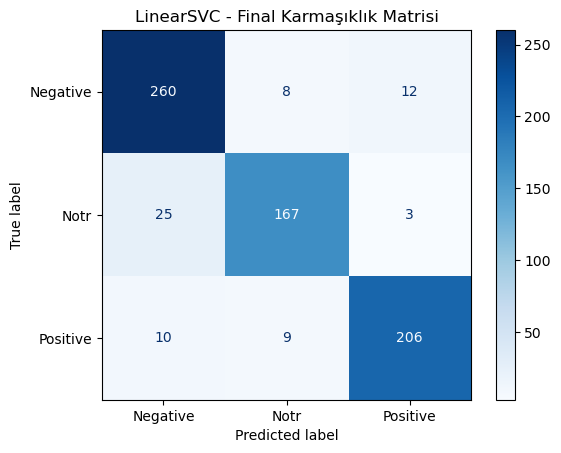

In [93]:
disp.plot(cmap='Blues')
plt.title("LinearSVC - Final Karmaşıklık Matrisi")
plt.show()